# Data Analysis for Physics and Astronomy
## Sommersemster 2024 
# Assignment 1

Due: **10:00 30. April 2024**

Discussion: **12:00 30. April 2024**

**Online submission** at via github classroom  

# 1. Sampling [70 points]

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its
name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example,
respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of
healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research
questions that motivate the study and many interesting results derived from the data.

In [1]:
%matplotlib inline

## Visually inspect the ASCII data file from the Data/ directory
The data file is zipped: `cdbrfss1999.zip`. Unzip it and look at it. It is in ASCII format.

The file `Codebook99.rtf` contains a detailed explanation of the individual data entries. Use the
Cookbook to understand the data columns that you are working on in this problem.

## Large data

The dataset contains 159989 entries.

**a.** Take a sample of 30000 from this dataset and export it to an ASCII file. Make sure that your method allows to draw more than one sample from the population. **[10 points]**

In [ ]:
#cdbrfss = # TODO: import the file cdbrfss1999.csv with the Pandas command pd.read_csv . This creates the DataFrame cdbrfss. You can read directly from the zip file with the compression='zip' option.
import pandas as pd
cdbrfss = pd.read_csv('Data/cdbrfss1999.zip', compression='zip') #inhalt aus .zip datei wird gelesen
sample_cdbrfss = cdbrfss.sample(30000, random_state=7) # 30000 Zeilen, jeweils die 7. Zeile genommen für Reproduzierbarkeit

sample_cdbrfss.to_csv('Data/sample_cdbrfss.csv', index=False, encoding='ascii') # die 30000 Zeilen werden in eine neue csv datei geschrieben

print(len(sample_cdbrfss)) # wie viele Zeilen sind in der neuen csv datei




/tmp/ipykernel_7104/584736844.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cdbrfss = pd.read_csv('Data/cdbrfss1999.zip', compression='zip') #inhalt aus .zip datei wird gelesen


30000


Look up the `DataFrame.sample()` method here: [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html#pandas.DataFrame.sample)

In [ ]:
# TODO: Pandas DataFrames have the method .sample associated to randomly sample from the list. 

**b.** Discuss your method to do so. Is your sampling a "good sample" in the sense that it is representative for the larger "population"? **[5 points]**

da .sample zufällig wählt, sind die Daten willkürlich und repräsentativ

## Large columns

Each case in the dataset can have up to 241 variables. Each one of these variables corresponds to a question that was asked in the survey. For example, for **genhlth**, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The **exerany** variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, **hlthplan** indicates whether the respondent had some form of health coverage (1) or did not (0). The **smoke100** variable indicates whether the respondent had smoked at least 100 cigarettes in her lifetime. The other variables record the respondent’s height in inches (**hti**) and feet (**htf**), **weight** in pounds as well as their desired weight, **wtdesire**, **age** in years, and **sex**.

**a.** Locate the columns corresponding to the variables **genhlth**, **exerany**, **htf**, **hti**, **smoke100**, **weight**, **wtdesire**, **age**, and **sex**.

Any reasonable method of isolating the columns and saving the subsample is accepted. For `pandas`, the list of column names is an attribute of the `DataFrame` object, and where columns without a column name are given the title 'Unnamed: [index]'.

In [ ]:
import pandas as pd
cdbrfss = pd.read_csv('Data/sample_cdbrfss.csv') #inhalt aus sample datei wird gelesen
#mithilfe von Copilot
columns_of_interest = ['GENHLTH', 'EXERANY', 'HTF', 'HTI', 'SMOKE100', 'WEIGHT', 'WTDESIRE', 'AGE', 'SEX']
               #erstelle liste mit den Spalten, die ich haben möchte        
available_columns = [col for col in columns_of_interest if col in cdbrfss.columns]
               #durchsuchen der Spalten in der Liste, die ich haben möchte und die auch in der csv datei vorhanden sind
filtered_cdbrfss = cdbrfss[available_columns] # Filter the DataFrame to include only the columns of interest

print(filtered_cdbrfss) # print the columns that are available in the DataFrame

       GENHLTH  EXERANY  HTF  HTI  SMOKE100  WEIGHT  WTDESIRE  AGE  SEX
0            2      NaN    6    2         1     195       NaN   56    1
1            2      NaN    5    9         1     236       NaN   53    1
2            1      NaN    5   11         1     172       NaN   41    1
3            2      NaN    5    6         1     125       NaN   33    2
4            2      NaN    5    9         2     196       NaN   36    1
...        ...      ...  ...  ...       ...     ...       ...  ...  ...
29995        2      NaN    5    3         1     135       NaN   74    2
29996        1      NaN    5    4         1     115       NaN   27    2
29997        2      NaN    5    6         1     165       NaN   54    2
29998        1      NaN    5   10         2     175       NaN   34    1
29999        2      NaN    5    5         2     150       NaN   39    2

[30000 rows x 9 columns]


In [6]:
cdbrfss.columns

Index(['STATE', 'GEOSTR', 'DENSTR', 'PSU', 'RECORD', 'IMONTH ', 'IDAY ',
       'IYEAR ', 'INTVID ', 'Unnamed: 9',
       ...
       'Unnamed: 272', 'Unnamed: 273', 'Unnamed: 274', 'Unnamed: 275',
       'Unnamed: 276', 'Unnamed: 277', 'Unnamed: 278', 'Unnamed: 279',
       'Unnamed: 280', 'Unnamed: 281'],
      dtype='object', length=282)

In [7]:
cdbrfss.columns.values

array(['STATE', 'GEOSTR', 'DENSTR', 'PSU', 'RECORD', 'IMONTH ', 'IDAY ',
       'IYEAR ', 'INTVID ', 'Unnamed: 9', 'DISPCODE', 'WINDDOWN', 'SEQNO',
       'NATTMPTS', 'NRECSEL', 'NRECSTR', 'BPSELWT', 'WAKSS1S2',
       'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'GENHLTH', 'PHYSHLTH',
       'MENTHLTH', 'POORHLTH', 'HLTHPLAN', 'MEDICAR2', 'TYPCOVR1',
       'TYPCOVR2', 'NOCOV12', 'PASTPLAN', 'MEDCOST', 'CHECKUP', 'BPTAKE',
       'BPHIGH', 'HIGHGT1', 'BLOODCHO', 'CHOLCHK', 'TOLDHI', 'DIABETES',
       'LASTDEN2', 'RMVTEETH', 'DENCLEAN', 'SUNBURN', 'NUMBURN',
       'SMOKE100', 'SMOKEDAY', 'SMOKENUM', 'SMOKNM30', 'STOPSMOK',
       'LASTSMOK', 'DRINKANY', 'ALCOHOL', 'NALCOCC', 'DRINKGE5',
       'DRINKDRI', 'AGE', 'ORACE', 'HISPANIC', 'MARITAL', 'CHLD04',
       'CHLD0512', 'CHLD1317', 'EDUCA', 'EMPLOY', 'INCOME2', 'WEIGHT',
       'HTF', 'HTI', 'CTYCODE', 'NUMHHOLD', 'NUMPHONS', 'SEX', 'HADMAM',
       'HOWLONG', 'WHYDONE', 'PROFEXAM', 'LENGEXAM', 'REASEXAM', 'HADPAP',
       'LASTPAP', 'WHYPAP'

In [ ]:
# TODO: understand what the following commands do
columns = {"GENHLTH":22, "EXERANY":196, "HLTHPLAN":26, "SMOKE100":46, "HTF":68, "HTI":69, "WEIGHT":67, "WTDESIRE":210, "AGE":57, "SEX":73}
#columns erzeugt ein Dictionary mit den Spaltennamen und den dazugehörigen Zahlen, in die
#es umbenannt werden soll
desired_column_names = [key for key, value in columns.items()]
#erstellt eine Liste mit den Spaltennamen, die ich haben möchte
#liest nur die keys aus dem Dictionary aus, nicht die values
print(desired_column_names)
#die Liste wird ausgegeben und ich sehe, dass die Spaltennamen, die ich haben möchte, auch in der Liste sind

['GENHLTH', 'EXERANY', 'HLTHPLAN', 'SMOKE100', 'HTF', 'HTI', 'WEIGHT', 'WTDESIRE', 'AGE', 'SEX']


**b.** Reduce your sample to include only these variables and export it to an ASCII file. **[2 points]**

- Use the method `DataFrame.loc` [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) to select the columns you want.

- Use the method `DataFrame.to_csv` [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) to export the subset to a CSV file.

In [20]:
import pandas as pd
cdbrfss = pd.read_csv('Data/sample_cdbrfss.csv') #inhalt aus sample datei wird gelesen
#mithilfe von Copilot
columns_of_interest = ['GENHLTH', 'EXERANY', 'HTF', 'HTI', 'SMOKE100', 'WEIGHT', 'WTDESIRE', 'AGE', 'SEX']
               #erstelle liste mit den Spalten, die ich haben möchte        
available_columns = [col for col in columns_of_interest if col in cdbrfss.columns]
               #durchsuchen der Spalten in der Liste, die ich haben möchte und die auch in der csv datei vorhanden sind
filtered_cdbrfss = cdbrfss[available_columns] # Filter the DataFrame to include only the columns of interest

filtered_cdbrfss_csv = filtered_cdbrfss.to_csv('Data/filtered_cdbrfss.csv', index=False, encoding='ascii')
#print(filtered_cdbrfss) # print the columns that are available in the DataFrame

mit .loc habe ich wohl noch probleme 

In [19]:
import pandas as pd
cdbrfss = pd.read_csv('Data/sample_cdbrfss.csv') #inhalt aus sample datei wird gelesen
reduced_sample = cdbrfss.loc[:['GENHLTH', 'EXERANY', 'HTF', 'HTI', 'SMOKE100', 'WEIGHT', 'WTDESIRE', 'AGE', 'SEX']]
#behält nur die Spalten, die ich haben möchte
reduced_sample_cdbrfss = cdbrfss[reduced_sample]
#cdbrfss[reduced_sample.columns] #behält nur die Spalten, die ich haben möchte
sample_cdbrfss_reduced = reduced_sample_cdbrfss.to_csv('Data/sample_cdbrfss_reduced.csv', index=False, encoding='ascii')
#die neue csv datei wird erstellt
print(sample_cdbrfss_reduced) # die neue csv datei wird ausgegeben

InvalidIndexError: ['GENHLTH', 'EXERANY', 'HTF', 'HTI', 'SMOKE100', 'WEIGHT', 'WTDESIRE', 'AGE', 'SEX']

**c.** How many cases and how many variables are there in your sample? **[2 points]**

- (a) 9 cases; 30,000 variables

- (b) 8 cases; 30,000 variables

- (c) 30,000 cases; 9 variables

- (d) 159,989 cases; 10 variables

c)

**d.** What type of variable is **genhlth**? **[2 points]**

- (a) numerical, continuous

- (b) numerical, discrete

- (c) categorical (not ordinal)

- (d) categorical, ordinal

**e.** What type of variable is **weight**? **[2 points]**

- (a) numerical, continuous

 - (b) numerical, discrete

 - (c) categorical (not ordinal)

 - (d) categorical, ordinal

b)

**f.** What type of variable is **smoke100**? **[2 points]**

 - (a) numerical, continuous
 
 - (b) numerical, discrete
 
 - (c) categorical (not ordinal)
 
 - (d) categorical, ordinal

b)

## One Bar chart

Take all **genhlth** entries from your sample and draw a bar chart to visualize how the cases are distributed across the possible categories. Convert the numerical encoding to their represetations, e.g. 1 -> "Excellent". Check the data cookbook for details. **[10 points]**

- You can use `DataFrame.value_counts` to return the distribution counts. [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

- You can use `DataFrame.plot` to easily plot a Pandas Series or DataFrame. [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Label your axes!


1    6717
2    9900
3    8677
4    3324
5    1312
7      61
9       9
Name: GENHLTH, dtype: int64


AttributeError: 'AxesSubplot' object has no attribute 'show'

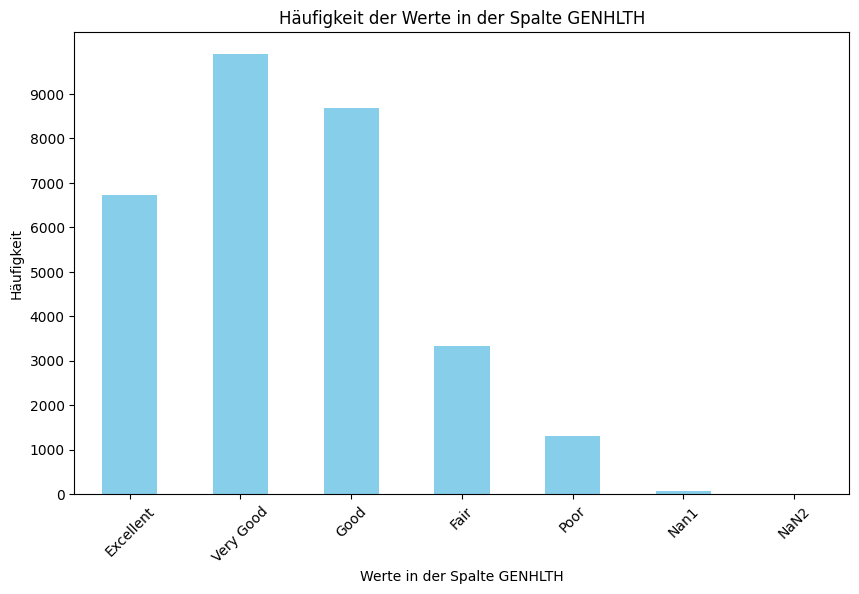

In [38]:
import pandas as pd
cdbrfss = pd.read_csv('Data/sample_cdbrfss.csv') #inhalt aus sample datei wird gelesen
genhlth_counts = cdbrfss['GENHLTH'].value_counts().sort_index() # die Häufigkeit der Werte in der Spalte GENHLTH wird gezählt
print(genhlth_counts) # die Häufigkeit der Werte in der Spalte GENHLTH wird ausgegeben

plot = genhlth_counts.plot(kind='bar', figsize=(10, 6), color='skyblue') # die Häufigkeit der Werte in der Spalte GENHLTH wird als Balkendiagramm ausgegeben
plot.set_title('Häufigkeit der Werte in der Spalte GENHLTH') # Titel des Diagramms
plot.set_xlabel('Werte in der Spalte GENHLTH') # x-Achse des Diagramms
plot.set_ylabel('Häufigkeit') # y-Achse des Diagramms
plot.set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Nan1', 'NaN2'] , rotation=45) # x-Achse des Diagramms
plot.set_yticks(range(0, 10000, 1000)) # y-Achse des Diagramms
plot.set_yticklabels(range(0, 10000, 1000)) # y-Achse des Diagramms
plot.show() # Diagramm wird angezeigt


## Two Bar Charts

Combine the **smoke100** with the **genhlth** entries from your sample and draw __TWO__ bar charts, one showing the health of the smokers and a second one showing the health of the non-smokers. **[15 points]**

Häufigkeiten von GENHLTH für Raucher (SMOKE100 == 1):
1    2571
2    4476
3    4330
4    1751
5     803
7      30
9       2
Name: GENHLTH, dtype: int64

Häufigkeiten von GENHLTH für Nicht-Raucher (SMOKE100 == 2):
1    4131
2    5398
3    4323
4    1561
5     503
7      31
9       5
Name: GENHLTH, dtype: int64


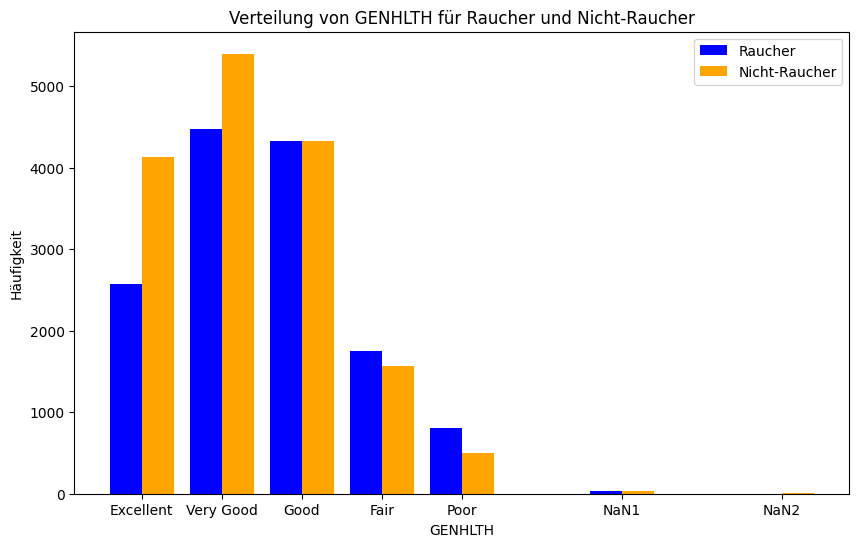

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
cdbrfss = pd.read_csv('Data/sample_cdbrfss.csv') #inhalt aus sample datei wird gelesen

#smokers
smokers = cdbrfss[cdbrfss['SMOKE100'] == 1] # Filter für Raucher
#non_smokers
non_smokers = cdbrfss[cdbrfss['SMOKE100'] == 2] # Filter für Nichtraucher
#Häufigkeiten der Werte in der Spalte GENHLTH für Raucher
genhlth_counts = cdbrfss['GENHLTH'].value_counts().sort_index() # die Häufigkeit der Werte in der Spalte GENHLTH wird gezählt
smoke_counts = cdbrfss['SMOKE100'].value_counts().sort_index() # die Häufigkeit der Werte in der Spalte SMOKE100 wird gezählt
smokers_genhlth_counts = smokers['GENHLTH'].value_counts().sort_index() # die Häufigkeit der Werte in der Spalte GENHLTH wird gezählt
non_smokers_genhlth_counts = non_smokers['GENHLTH'].value_counts().sort_index() # die Häufigkeit der Werte in der Spalte GENHLTH wird gezählt
# Ergebnisse ausgeben
print("Häufigkeiten von GENHLTH für Raucher (SMOKE100 == 1):")
print(smokers_genhlth_counts) # die Häufigkeit der Werte in der Spalte GENHLTH wird ausgegeben
print("\nHäufigkeiten von GENHLTH für Nicht-Raucher (SMOKE100 == 2):")
print(non_smokers_genhlth_counts) # die Häufigkeit der Werte in der Spalte GENHLTH wird ausgegeben
#print(smoke_counts) # die Häufigkeit der Werte in der Spalte SMOKE100 wird ausgegeben
#print(genhlth_counts) # die Häufigkeit der Werte in der Spalte GENHLTH wird ausgegeben

plt.figure(figsize=(10, 6)) # Größe des Diagramms   
plt.bar(smokers_genhlth_counts.index - 0.2, smokers_genhlth_counts.values, width=0.4, label='Raucher', color='blue') # die Häufigkeit der Werte in der Spalte GENHLTH wird als Balkendiagramm ausgegeben
plt.bar(non_smokers_genhlth_counts.index + 0.2, non_smokers_genhlth_counts.values, width=0.4, label='Nicht-Raucher', color='orange') # die Häufigkeit der Werte in der Spalte GENHLTH wird als Balkendiagramm ausgegeben
# Diagramm-Details
plt.title('Verteilung von GENHLTH für Raucher und Nicht-Raucher') # Titel des Diagramms
plt.xlabel('GENHLTH') # x-Achse des Diagramms
plt.ylabel('Häufigkeit') # y-Achse des Diagramms
plt.xticks(ticks=smokers_genhlth_counts.index,labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'NaN1', 'NaN2'])  # Setze die x-Achsen-Beschriftung
plt.legend() # Legende des Diagramms
# Diagramm anzeigen
plt.show() # Diagramm wird angezeigt


#plot1 = smokers_genhlth_counts.plot(kind='bar', figsize=(10, 6), color='skyblue') # die Häufigkeit der Werte in der Spalte GENHLTH wird als Balkendiagramm ausgegeben
#plot1.set_title('Häufigkeit der Werte in der Spalte GENHLTH für Raucher') # Titel des Diagramms
#plot1.set_xlabel('Werte in der Spalte GENHLTH') # x-Achse des Diagramms
#plot1.set_ylabel('Häufigkeit') # y-Achse des Diagramms
#plot1.set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Nan1', 'NaN2'] , rotation=45) # x-Achse des Diagramms
#plot1.set_yticks(range(0, 10000, 1000)) # y-Achse des Diagramms
#plot1.set_yticklabels(range(0, 10000, 1000)) # y-Achse des Diagramms
#plot1.show() # Diagramm wird angezeigt

#plot2 = non_smokers_genhlth_counts.plot(kind='bar', figsize=(10, 6), color='skyblue') # die Häufigkeit der Werte in der Spalte GENHLTH wird als Balkendiagramm ausgegeben
#plot2.set_title('Häufigkeit der Werte in der Spalte GENHLTH für Nicht-Raucher') # Titel des Diagramms
#plot2.set_xlabel('Werte in der Spalte GENHLTH') # x-Achse des Diagramms
#plot2.set_ylabel('Häufigkeit') # y-Achse des Diagramms
#plot2.set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Nan1', 'NaN2'] , rotation=45) # x-Achse des Diagramms
#plot2.set_yticks(range(0, 10000, 1000)) # y-Achse des Diagramms
#plot2.set_yticklabels(range(0, 10000, 1000)) # y-Achse des Diagramms
#plot2.show() # Diagramm wird angezeigt



## BMI

Next let’s consider a new variable **bmi** that doesn’t show up directly in this data set: Body Mass Index (BMI).  **[20 points]**

BMI is a weight to height ratio and can be calculated as.

$$  \mathrm{BMI} = \frac{\mathrm{weight(lb)}}{\mathrm{height(in)}^2} * 703$$

703 is the approximate conversion factor to change units to metric (meters and kilograms)
from imperial (inches and pounds). Compute the bmi for each case in your sample and add it to
the sample (e.g. as additional column). Visualize the distribution of the BMI in your sample.

**ATTENTION**: Remember, that the height was given in feet and inches separately. make sure
to compute the total height in inches! 

Look up the Cookbook definition. Note that the values in the height columns may have special values indicating invalid entries. E.g. 777 corresponds to an unknown or uincertain height in inches and 999 corresponds to a refused answer. Similar  issues arise with the height in feet numbers. Make sure to clean your data from these invalid entries. 

**HINT** You can use the `DataFrame.isin` method ( [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)) together with the logical NOT operator `~` to only select contents from a list that are not in a list of values. Don't forget to convert feet to inches. The units package helps: 

In [43]:
(1 * u.imperial.foot).to(u.imperial.inch).value

12.0

# 2. Multi-Dimensional Visualization [30 Points]

There are many different possibilities to visualize data. In this exercise you should select a particular
suitable way to visualize the provided data sets. Think about what information you want to relay and
what method works best - be creative (especially for the high-dimensional data.

The directory Data/ contains all data files for this problem in CSV-format.

Here is a brief example on how to plot data from a Pandas dataframe.

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

Remember that Pandas allows to plot data very easily ([DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)):

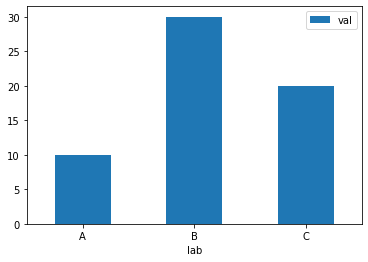

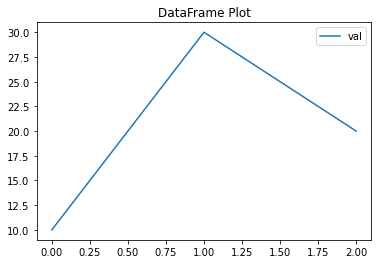

In [45]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

ax = df.plot(kind='bar', x='lab', y='val', rot=0)

ax = df.plot(title="DataFrame Plot")

## 1-D data

Load the data in `Data/DATA-Exercise1-1D.csv`.

Show the results of 1000 coin tosses (head "H" or tail "T").  **[5 points]**

   0
0  H
1  H
2  H
3  H
4  T
1000
0    1
1    1
2    1
3    1
4    0
Name: 0, dtype: int64


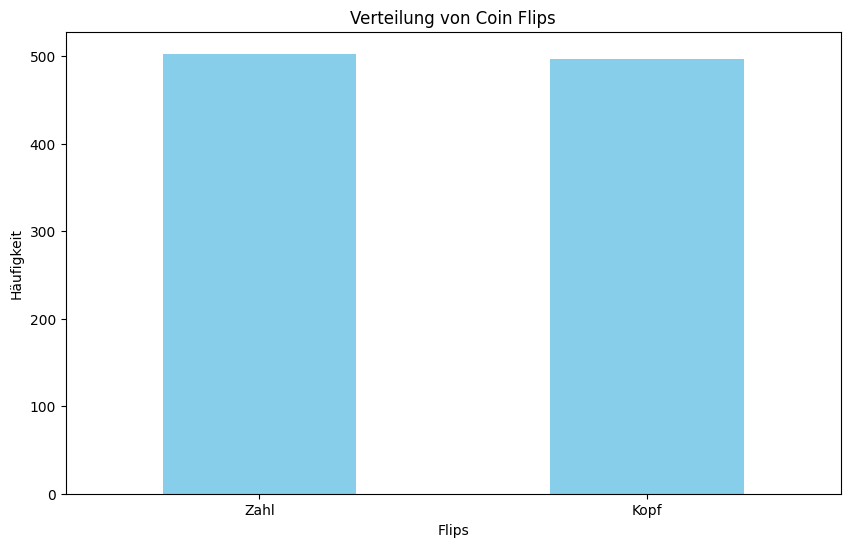

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die Daten ohne Kopfzeile
Data1d = pd.read_csv('Data/DATA-Exercise1-1D.csv', header=None)

# Überprüfe die ersten Zeilen der Daten
print(Data1d.head())  # Ausgabe der ersten 5 Zeilen der DataFrame
print(len(Data1d))  # Ausgabe der Anzahl der Zeilen in der DataFrame

# Wähle die erste Spalte (Index 0), da die Datei keine Spaltennamen hat
coin_flips = Data1d[0]  # Zugriff auf die erste Spalte

# Mapping der Buchstaben H und T zu numerischen Werten
labels = {"H": 1, "T": 0}  # H = Head, T = Tail
coin_flips = coin_flips.map(labels)  # Mapping der Labels auf die Werte

# Überprüfe, ob das Mapping erfolgreich war
print(coin_flips.head())

# Zähle die Häufigkeiten der Werte
coin_flips_counts = coin_flips.value_counts().sort_index()

# Plotten der Ergebnisse
ax = coin_flips_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')  # Balkendiagramm
ax.set_xlabel("Flips")  # x-Achse des Diagramms
ax.set_xticklabels(['Zahl', 'Kopf'], rotation=0)  # x-Achse des Diagramms
ax.set_ylabel("Häufigkeit")  # y-Achse des Diagramms
ax.set_title("Verteilung von Coin Flips")  # Titel des Diagramms
plt.show()  # Diagramm anzeigen

## 2-D data

Load the data in `Data/DATA-Exercise1-2D.csv`.

Plot the world population since 10 000 B.C.  **[5 points]**

        year  \
0     -10000   
1      -9999   
2      -9998   
3      -9997   
4      -9996   
...      ...   
12011   2011   
12012   2012   
12013   2013   
12014   2014   
12015   2015   

       World Population (Spline Interpolation until 1950) (https://ourworldindata.org/world-population-growth/)  
0                                           2.431214e+06                                                         
1                                           2.432196e+06                                                         
2                                           2.433179e+06                                                         
3                                           2.434162e+06                                                         
4                                           2.435145e+06                                                         
...                                                  ...                                                         
12011    

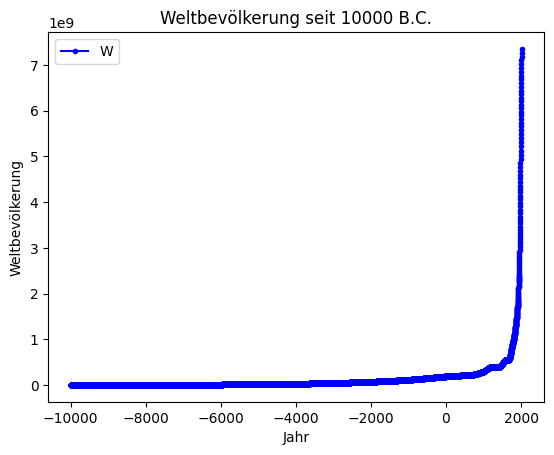

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

Data2d = pd.read_csv('Data/DATA-Exercise1-2D.csv')

print(Data2d) 

ax = Data2d.plot(title="Weltbevölkerung seit 10000 B.C.", x="year", y="World Population (Spline Interpolation until 1950) (https://ourworldindata.org/world-population-growth/)", color="blue", marker=".")  # Plotten der Daten
ax.set_xlabel("Jahr")  # x-Achse des Diagramms
ax.set_ylabel("Weltbevölkerung")  # y-Achse des Diagramms
plt.legend("World population")
plt.show()  # Diagramm anzeigen

## 3-D data

Load the data in `Data/DATA-Exercise1-3D.csv`.

Display the intensity map (using the columns x, y, and intensity).  **[5 points]**

      x     y  intensity
0 -10.0 -10.0   0.184291
1 -10.0  -9.9  -0.640470
2 -10.0  -9.8   0.611648
3 -10.0  -9.7  -0.130589
4 -10.0  -9.6   0.171761


AttributeError: 'AxesSubplot' object has no attribute 'show'

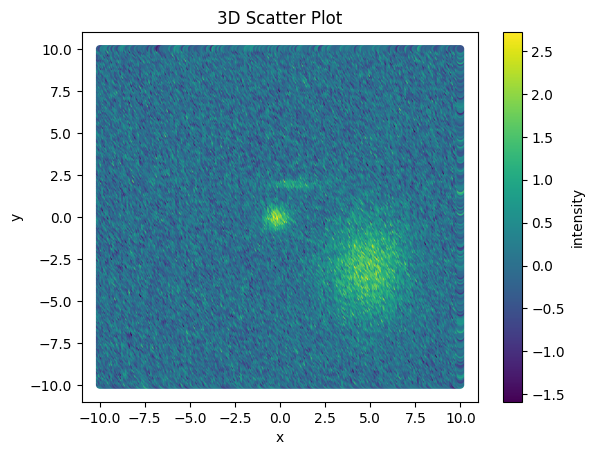

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die Datei ohne Spaltennamen
data_3d = pd.read_csv('Data/DATA-Exercise1-3D.csv', header=None)

# Benenne die Spalten für bessere Lesbarkeit
data_3d.columns = ['x', 'y', 'intensity']

# Überprüfe die ersten Zeilen der Datei
print(data_3d.head())

ax = data_3d.plot(kind='scatter', x='x', y='y', c='intensity', colormap='viridis', title="3D Scatter Plot")  # Streudiagramm erstellen
plot.show()

# Plotten der Intensitätskarte
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_3d['x'], data_3d['y'], c=data_3d['intensity'], cmap='viridis')
plt.colorbar(scatter, label='Intensity')
plt.title('Intensity Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 4-D data

Load the data in `Data/DATA-Exercise1-3D.csv`.

How will you show the volume properties (using columns x, y, z, and value)  **[5 points]**

## 5-D data

Load the data in `Data/DATA-Exercise1-4D.csv`.

Represent this table with columns "Country", "PovertyFraction", "GDPPerCapita $", "MilitaryExpenditureFraction", "Population". **[5 points]**

## 6-D data

Load the data in `Data/DATA-Exercise1-6D.csv`.

Find a way to visually represent the data (with columns x, y, z, size, val, direction angle).  **[5 points]**